**Tutorial del Proyecto K-vecinos más Cercanos**
Comprender un dataset nuevo.
Modelar los datos utilizando un KNN.
Analizar los resultados y optimizar el modelo.

**🌱 Cómo iniciar este proyecto
Sigue las siguientes instrucciones:**

1. Crea un nuevo repositorio basado en el proyecto de Machine Learning haciendo clic aquí.

2. Abre el repositorio creado recientemente en Codespace usando la extensión del botón de Codespace.

3. Una vez que el VSCode del Codespace haya terminado de abrirse, comienza tu proyecto siguiendo las instrucciones a continuación.

**📝 Instrucciones**
**Clasificador de Vinos con KNN**

Entrena un modelo de K-Vecinos más Cercanos (KNN) para predecir la calidad de un vino tinto a partir de sus características químicas. ¿Podría una IA ayudarte a elegir un vino digno de sommelier?

Utilizaremos el siguiente dataset de vinos tintos extraido de Wine Quality Data Set - UCI

https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv

**Descripción de las columnas**

Cada fila representa un vino. Las columnas describen su composición química:

- fixed acidity, volatile acidity, citric acid

- residual sugar, chlorides

- free sulfur dioxide, total sulfur dioxide

- density, pH, sulphates, alcohol

La columna objetivo es label:

- 0 = Baja calidad

- 1 = Calidad media

- 2 = Alta calidad

**¡Empecemos! 😎**

1. Carga los datos. Carga el CSV con Pandas y explora su estructura.

2. Entrena el modelo KNN:

- Separa las variables independientes (X) del objetivo (y).

- Divide en conjunto de entrenamiento y prueba (80/20).

- Escala los datos si es necesario (¡muy recomendable con KNN!).

- Entrena el modelo con un valor de k inicial.

3. Evalúa el rendimiento usando:

- accuracy_score

- confusion_matrix

- classification_report

4. Optimización de k. Crea un bucle para probar diferentes valores de k (por ejemplo, de 1 a 20).

Guarda los resultados en una lista.

Grafica accuracy vs k para encontrar el mejor valor.

**¿Te sientes confiado/a?**
Crea una función que reciba valores numéricos y prediga la calidad

predict_wine_quality([7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4])
>>> "Este vino probablemente sea de calidad media 🍷"
Nota: También incorporamos muestras de solución en ./solution.ipynb que te sugerimos honestamente que solo uses si estás atascado por más de 30 minutos o si ya has terminado y quieres compararlo con tu enfoque.

**🚀 Haz visible tu trabajo**

Trabajaste con un dataset real del UCI Machine Learning Repository, aplicaste modelos de clasificación supervisada, analizaste características químicas y desarrollaste una función que simula el juicio de un sommelier usando IA. ¡Eso merece ser contado!

**¿Qué compartir?**
Comparte una frase de insight que muestre cómo la IA puede clasificar la calidad del vino con base en su composición. Añade una gráfica de precisión vs. k (muy visual) o una predicción divertida con predict_wine_quality().

**✨ Ejemplo posteable**

"¿Puede la inteligencia artificial predecir la calidad de un vino? 🍷 Entrené un modelo KNN con datos reales del UCI ML Repo y alcancé una precisión del 73% al clasificar vinos en baja, media y alta calidad usando solo su composición química. Los datos no mienten: ¡el alcohol y el sulfato son más reveladores que una etiqueta! 😉 #MachineLearning #DataScience #WineLovers #IA #scikitLearn"

**🚛 Cómo entregar este proyecto**

Una vez que hayas terminado de resolver el caso práctico, asegúrate de confirmar tus cambios, haz push a tu repositorio y ve a 4Geeks.com para subir el enlace del repositorio.

## Imports

In [351]:
import numpy as np
from os import path
from pickle import dump
from scipy.stats import randint
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.datasets import  fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

## EDA

### Planteamiento del target:

¿Podría una IA ayudarte a elegir un vino digno de sommelier?

### PASO 1:

In [306]:
df = pd.read_csv(("/workspaces/machine-learning-elius123ef/data/raw/winequality-red.csv"), sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### PASO 2:

In [307]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [308]:
df.duplicated().sum()

np.int64(240)

In [309]:
df = df.drop_duplicates()

In [310]:
df['quality'].value_counts()[df['quality'].value_counts() > 7]

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

### PASO 3:

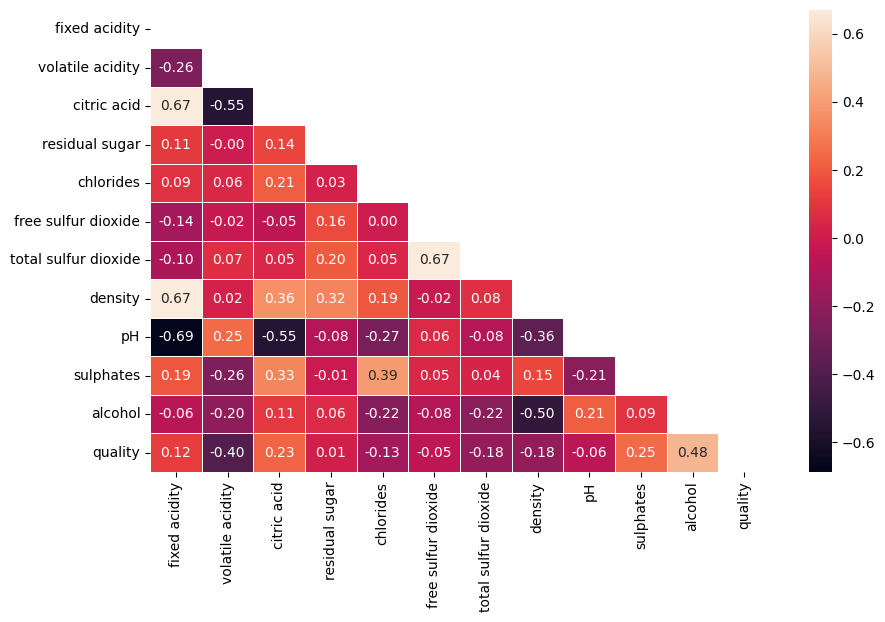

In [311]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")

plt.show()

##### Observacion:


Los vinos de alta calidad suelen tener:

- Mas alcohol, mas sulfuros y mas acido cítrico
- Menor acidez volatil, densidad y cloruros.

- La variable mas crítica para bajar calidad es la acidez volatil (correlación negativa mas fuerte).

- El alcohol es el mejor predictor positivo de calidad.

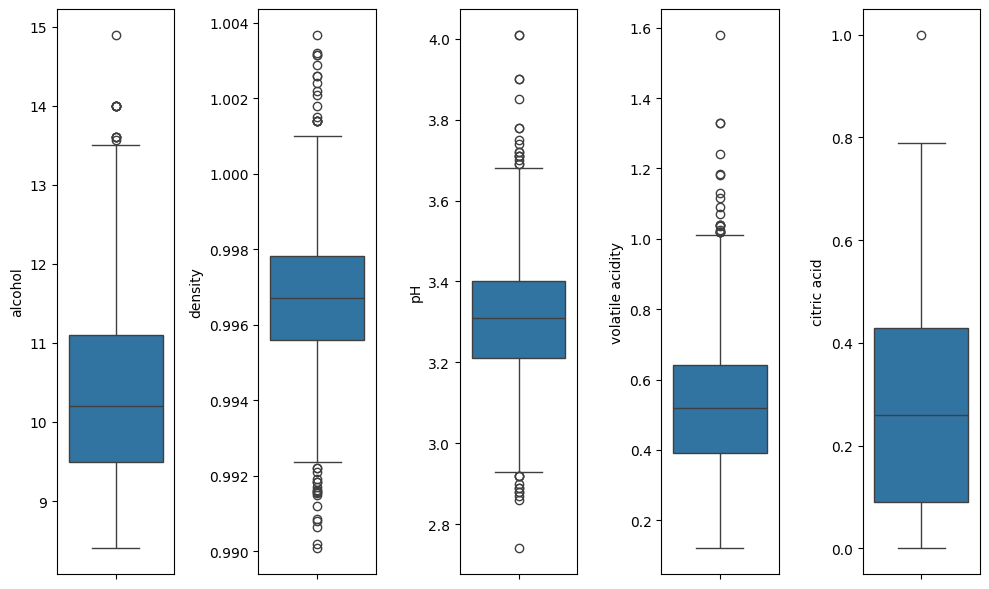

In [312]:
fig, axis = plt.subplots(figsize=(10, 6), ncols=5)

sns.boxplot(ax=axis[0], data=df, y="alcohol")
sns.boxplot(ax=axis[1], data=df, y="density")
sns.boxplot(ax=axis[2], data=df, y="pH")
sns.boxplot(ax=axis[3], data=df, y="volatile acidity")
sns.boxplot(ax=axis[4], data=df, y="citric acid")

plt.tight_layout()
plt.show()

In [313]:
df[df["citric acid"] >= 0]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### Agrupamos los vinos por calidad:

- 0 = Vino de baja calidad
- 1 = Vino de media calidad
- 2 = Vino de alta calidad

In [314]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.171231,0.578596,0.244523,2.509532,0.093971,17.161179,57.406412,0.997082,3.300815,0.623570,9.888562
6,8.337383,0.496084,0.279364,2.457290,0.085075,15.637383,40.816822,0.996565,3.318000,0.674542,10.658879
7,8.858683,0.403653,0.371856,2.716766,0.076832,13.994012,35.449102,0.996051,3.290060,0.742635,11.491118
8,8.441176,0.427647,0.382941,2.576471,0.068353,13.764706,34.470588,0.995095,3.274118,0.774706,12.158824


In [315]:
bins = [0, 4, 6, 10]
labels = ['0', '1', '2']

df['quality_group'] = pd.cut(df['quality'], bins=bins, labels=labels)

In [316]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_group
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [317]:
df['quality_group'].value_counts()

quality_group
1    1112
2     184
0      63
Name: count, dtype: int64

#### Eliminamos la columna "quality" para no tenerla duplicada con nuestra nueva columna de "quality_group"

In [318]:
df = df.drop('quality', axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_group
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


### Split 80/20

In [319]:
X = df.drop(columns=['quality_group'])
y = df['quality_group']

In [320]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


#### Escalado

In [321]:
numericas = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocesador = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numericas),])

In [322]:
X_train_ready = preprocesador.fit_transform(X_train)
X_test_ready = preprocesador.transform(X_test)


#### Modelo

In [323]:
model = KNeighborsClassifier()
model.fit(X_train_ready, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [324]:
y_pred = model.predict(X_test_ready)
y_pred

array(['1', '1', '2', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '2', '1',
       '1', '0', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '0', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1',
       '0', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '2', '1', '2', '1', '2', '1', '1', '1', '1', '2', '1

In [325]:
accuracy_score(y_test, y_pred)

0.8198529411764706

#### Buscamos los mejores hiperparametros

#### GridSearchCV

In [326]:
param_grid = {
    'n_neighbors': [3, 5, 10, 15, 20, 25, 30],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'p': [1, 2], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,20


In [327]:
grid_search.best_params_

{'n_neighbors': 20, 'p': 1, 'weights': 'distance'}

In [329]:
grid_search.best_score_

np.float64(0.8233627869614848)

#### RandomizedSearchCV

In [330]:
param_dist = { 'n_neighbors': randint(1, 50),
               'weights': ['uniform', 'distance'],
               'p': [1, 2],
               'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
               'leaf_size': randint(10, 50)
}

knn = KNeighborsClassifier()

random_search = RandomizedSearchCV(
     knn,
    param_dist,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    random_state=42
)

random_search.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,param_distributions,"{'algorithm': ['auto', 'ball_tree', ...], 'leaf_size': <scipy.stats....x74da11b86cd0>, 'n_neighbors': <scipy.stats....x74da13cabd90>, 'p': [1, 2], ...}"
,n_iter,30
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [331]:
random_search.best_params_

{'algorithm': 'brute',
 'leaf_size': 49,
 'n_neighbors': 24,
 'p': 1,
 'weights': 'distance'}

In [332]:
random_search.best_score_

np.float64(0.825206104933835)

### Comparaciones entre GridSearchCV y RandomizedSearchCV

GridSearchCV

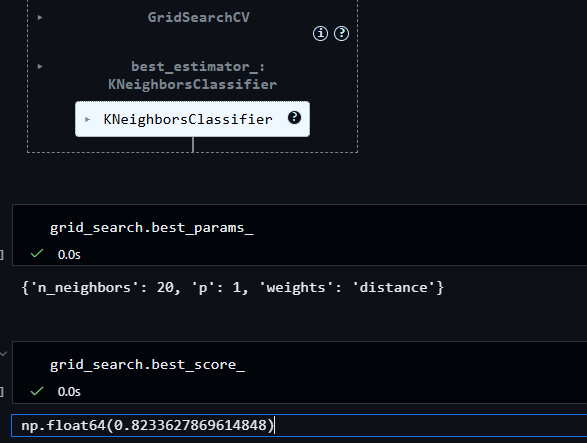
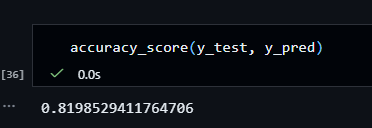

RandomizedSearchCV

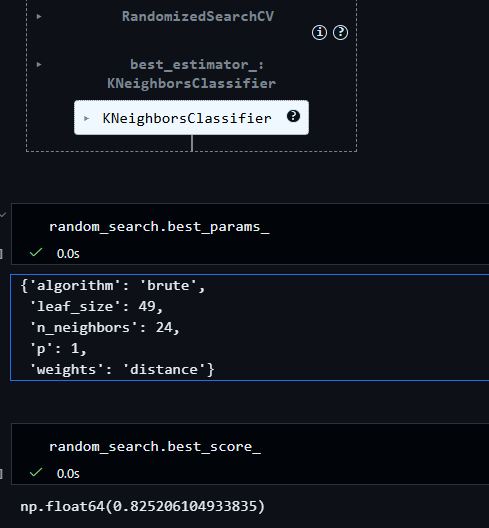

### Matriz de confusion

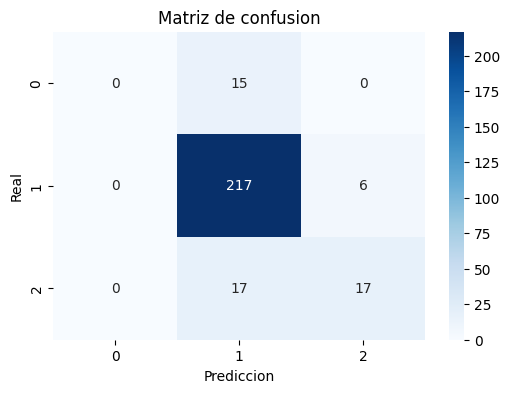

In [337]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.title('Matriz de confusion')
plt.show()

#### Observacion:


La matriz nos muestra que puede predecir facilmente nuestros vinos de clase 1, ya que tenemos muchas muestras en esta categoria, le cuesta predecir los vinos de clase 0 ya que tenemos pocas muestras y el modelo no puede detectarlas, por otra parte nuestros vinos de categoria 2 le ocurre lo mismo que a la categoria 0 pero en menor medida que dicha categoria (0), por lo tanto esta matriz nos sirve para:

1. Revisar el balance de clases
2. Ajustar el modelo
3. Revisar caracteristicas
4. Uso de pesos de clase

#### Reporte de clasificacion

In [338]:
report = classification_report(y_test, y_pred)

In [339]:
report = pd.DataFrame.from_dict(classification_report(y_test, y_pred, output_dict=True)).transpose()
report

,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,15.000000
1,0.871486,0.973094,0.919492,223.000000
2,0.739130,0.500000,0.596491,34.000000
accuracy,0.860294,0.860294,0.860294,0.860294
macro avg,0.536872,0.491031,0.505328,272.000000
weighted avg,0.806882,0.860294,0.828409,272.000000


#### Observacion

El reporte de clasificacion nos confirma que el modelo no puede predecir nuesta categoria 0 por falta de muestras ya que dicha categoria solo representa un 4,63% de nuestros datos, por otro lado tenemos que el 55% de los casos puede predecir nuestra categoria 2 ya que al igual que la categoria 0, tenemos pocas muestras teniendo solo un 13,53% de nuestros datos. Por ultimo tenemos que acierta un 86% de las veces en nuestra categoria 1 ya que tenemos suficientes datos para predecir teniendo un 81,84% de nuestros datos en dicha categoria.

Como conclusion final, nuestros modelos estan sesgado a predecir la clase mayoritaria y fracasa en las clases minoritarias por la falta de datos para entrenar dicho modelo.

### Optimizacion de k

In [340]:
results = []

for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_ready, y_train)
    y_pred = knn.predict(X_test_ready)
    acc = accuracy_score(y_test, y_pred)
    results.append((k, acc))


In [341]:
k, acc

(20, 0.8639705882352942)

In [342]:
best_k, best_acc = max(results, key=lambda x: x[1])
best_k, best_acc

(12, 0.875)

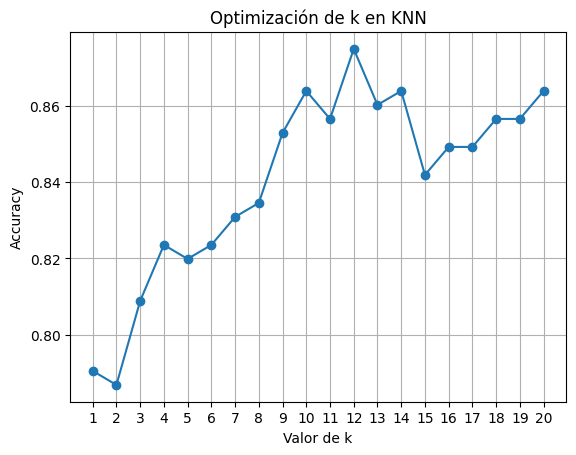

In [343]:
k_values, accuracies = zip(*results)
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Valor de k")
plt.ylabel("Accuracy")
plt.title("Optimización de k en KNN")
plt.xticks(range(1,21))
plt.grid(True)
plt.show()

#### Obersvacion


Con esto, encontramos que nuestra mejor k es 12 con un accuracy de 0.88%

In [344]:
model = KNeighborsClassifier(n_neighbors=best_k, p=1, leaf_size=49, algorithm='auto', weights='uniform')
model.fit(X_train_ready, y_train)

,n_neighbors,12
,weights,'uniform'
,algorithm,'auto'
,leaf_size,49
,p,1
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [345]:
y_pred = model.predict(X_test_ready)
y_pred

array(['1', '1', '2', '1', '1', '2', '1', '1', '1', '1', '2', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '2', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1

In [346]:
best_y_pred_test = model.predict(X_test_ready)
best_y_pred_train = model.predict(X_train_ready)

In [347]:
metrics = {"Accuracy Train: ": accuracy_score(best_y_pred_train, y_train),
           "Accuracy Test ": accuracy_score(best_y_pred_test, y_test)}
metrics

{'Accuracy Train: ': 0.8371665133394665, 'Accuracy Test ': 0.8676470588235294}

### Comparacion final


Luego de realizar la busqueda de los mejores hiperparametros, y de analizar nuestros datos en matriz de confusion, reporte de clasificacion y por ultimo encontrar nuestro mejor k, obtenmos estos resultados:

Mejor resultado con nuestros mejores hiperparametros encontrados :

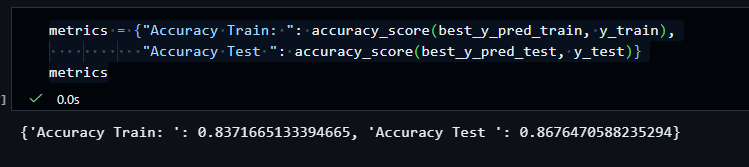
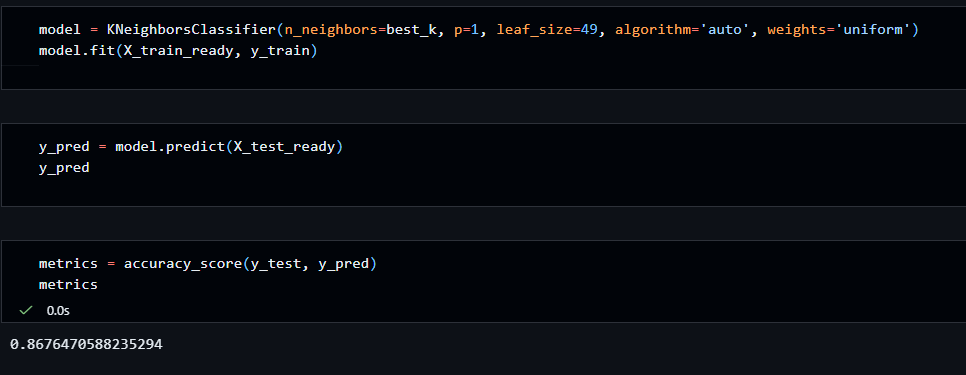

Segundo mejor resultado encontrado con RandomizedSearchCV

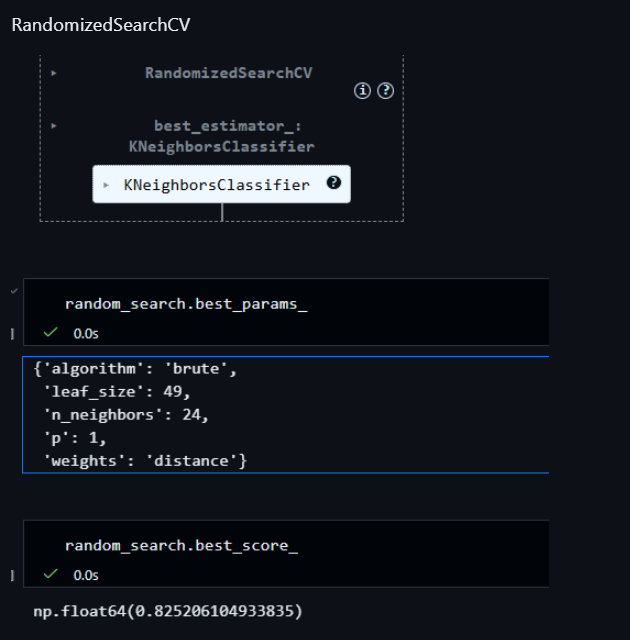

Tercer mejor resultado encontrado con GridSearchCV

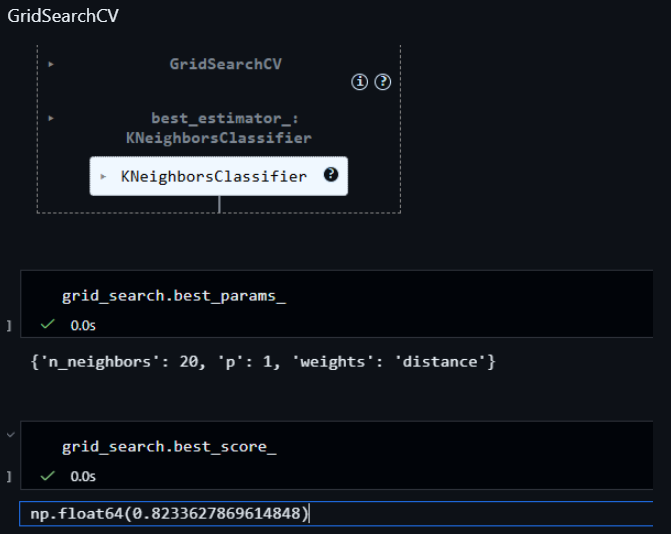

### Guardado de nuestro modelo

In [352]:
dump(model, open("knn_classifier_default.sav", "wb"))